# CASE 02 - Housing Price
Kamu akan melakukan proses EDA pada dataset "Housing Price", dengan menggunakan teknik visualisasi 
1D dan 2D. Dataset "Housing Price" berisi berbagai informasi mengenai properti-properti yang dijual, 
seperti zona lokasi, jumlah kamar tidur, ukuran tanah, dsb. Lakukan beberapa tahapan berikut ini:

## Tahap 1: Exploratory Data Analysis

1. Lakukan data preparation, seperti mengimport libraries dan variabel data

2. Terapkan drop variabel NaN untuk mengeliminasi data NaN

3. Pisahkan data numerikal dan kategorikal sebelum masuk ke tahap visualisasi

## Tahap 2: 1D Visualization

4. Buatlah visualisasi bar chart dan jelaskan analisis dari variabel kategorikal berikut: Utilities, HouseStyle, ExterQual
   
5. Buatlah visualisasi histogram dan jelaskan analisis dari variabel numerikal berikut: SalePrice, GrLivArea, PoolArea

6. Lakukan pemrosesan data dengan transformasi log-10 untuk masing-masing variabel numerikal.

## Tahap 3: 2D Visualization

7. Buatlah visualisasi hubungan antara dataset: GrLivArea dengan SalePrice, GarageArea dengan SalePrice

8. Lalu, buatlah analisis tentang hubungan antar-variabel tersebut!


# Data Preparation

In [8]:
# Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
import statistics as stats

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [28]:
# Import data
data = pd.read_csv(r"C:\Users\Acer\Project Data Science\Case Study 02\train_house.csv")
data

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [29]:
# Check NaN
total = data.isnull().sum().sort_values(ascending=False)
percent = (data.isnull().sum()/data.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
MasVnrType,872,0.597260
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageYrBlt,81,0.055479
GarageCond,81,0.055479
GarageType,81,0.055479


In [30]:
# Drop variabel NaN
data=data.dropna(axis=1)
data.head()

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000


In [31]:
# Memisahkan data menjadi numerikal
num_cols = data._get_numeric_data().columns
data_numeric = data[num_cols]
data_numeric.head()

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,8450,7,5,2003,2003,706,0,150,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,9600,6,8,1976,1976,978,0,284,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,11250,7,5,2001,2002,486,0,434,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,9550,7,5,1915,1970,216,0,540,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,14260,8,5,2000,2000,655,0,490,...,192,84,0,0,0,0,0,12,2008,250000


In [32]:
# Memisahkan data menjadi kategorikal
data_categorical = data.drop(num_cols, axis = 1)
data_categorical.head()

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,ExterCond,Foundation,Heating,HeatingQC,CentralAir,KitchenQual,Functional,PavedDrive,SaleType,SaleCondition
0,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,TA,PConc,GasA,Ex,Y,Gd,Typ,Y,WD,Normal
1,RL,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,...,TA,CBlock,GasA,Ex,Y,TA,Typ,Y,WD,Normal
2,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,TA,PConc,GasA,Ex,Y,Gd,Typ,Y,WD,Normal
3,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,...,TA,BrkTil,GasA,Gd,Y,Gd,Typ,Y,WD,Abnorml
4,RL,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,...,TA,PConc,GasA,Ex,Y,Gd,Typ,Y,WD,Normal


In [33]:
data_numeric.to_csv('data_numeric.csv')

In [34]:
data_categorical.to_csv('data_categorical.csv')

# 1D Visualization 

In [35]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [36]:
data_categorical = pd.read_csv('data_categorical.csv',index_col=0)
data_numeric = pd.read_csv('data_numeric.csv',index_col=0)

## Categorical Variables Visuaization
* Untuk keperluan analisis variabel kategori saya akan gunakan 3 contoh variabel yaitu : Utilities, HouseStyle, ExterQual

### Utilities

`Utilities` adalah variabel kategorikal yang menyediakan informasi tentang jenis fasilitas apa saja yang tersedia di properti tersebut. Variabel ini memiliki dua kategori:

* AllPub: Menyatakan bahwa semua utilitas publik (Electricity, Gas, Water, dan Sewer) tersedia di properti tersebut.

* NoSeWa: Menyatakan bahwa hanya listrik dan gas yang tersedia, tanpa sambungan air dan saluran pembuangan (water and sewer).	

<Axes: xlabel='Utilities', ylabel='proportion'>

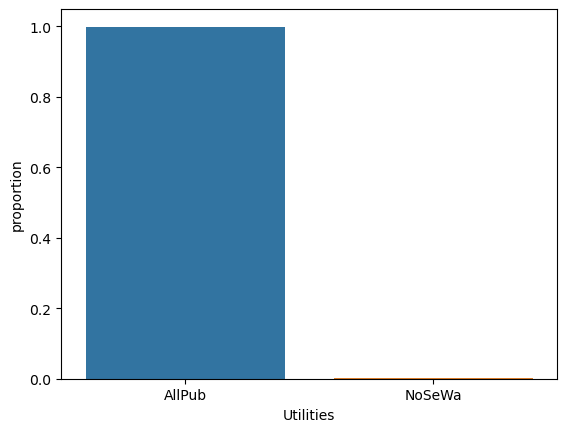

In [40]:
sns.barplot(x=data_categorical['Utilities'].value_counts().index,
                y=data_categorical['Utilities'].value_counts(normalize=True))

#### ANALISA VARIABEL UTILITIES
* Proporsi 1 untuk 'AllPub' mengindikasikan bahwa 100% properti dalam dataset memiliki semua fasilitas utilitas publik seperti listrik, gas, air, dan saluran pembuangan.

* Proporsi 0 untuk 'NoSeWa' menandakan bahwa tidak ada properti dalam dataset yang memiliki hanya sebagian fasilitas utilitas publik.

### HouseStyle

Setiap kategori memiliki deskripsi yang menjelaskan jenis bangunan tersebut, seperti jumlah lantai, apakah lantainya sudah selesai atau belum, serta jenis bangunan seperti split foyer atau split level.
HouseStyle: Style properti (misal: 1 lantai, 2 lantai, dst)
	
* 1Story (One story): Properti dengan satu lantai.

* 1.5Fin (One and one-half story: 2nd level finished): Properti dengan satu setengah lantai dimana lantai kedua sudah selesai.

* 1.5Unf (One and one-half story: 2nd level unfinished): Properti dengan satu setengah lantai dimana lantai kedua belum selesai.

* 2Story (Two story): Properti dengan dua lantai.

* 2.5Fin (Two and one-half story: 2nd level finished): Properti dengan dua setengah lantai dimana lantai kedua sudah selesai.

* 2.5Unf (Two and one-half story: 2nd level unfinished): Properti dengan dua setengah lantai dimana lantai kedua belum selesai.

* SFoyer (Split Foyer): Properti dengan desain foyer terpisah.

* SLvl (Split Level): Properti dengan desain level terpisah.

<Axes: xlabel='HouseStyle', ylabel='proportion'>

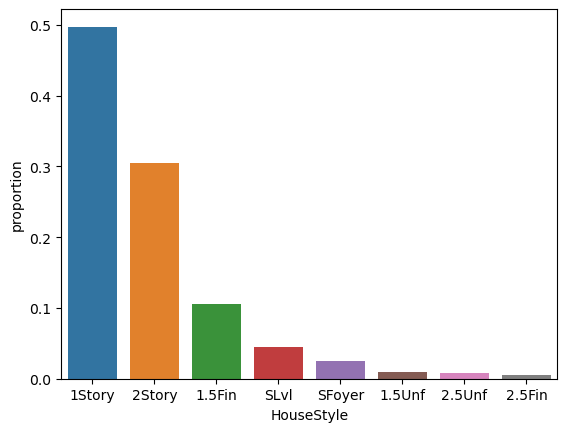

In [41]:
sns.barplot(x=data_categorical['HouseStyle'].value_counts().index,
                y=data_categorical['HouseStyle'].value_counts(normalize=True))

#### ANALISA VARIABEL HOUSESTYLE
Dari bar chart yang menggambarkan proporsi setiap jenis gaya bangunan, terlihat bahwa:

* '1Story' mendominasi dengan proporsi sekitar 50%, menunjukkan bahwa setengah dari properti dalam dataset memiliki satu lantai.

* '2Story' memiliki proporsi sekitar 30%, menandakan bahwa sekitar 30% properti memiliki dua lantai.

* '1.5Fin' memiliki proporsi sekitar 10%, menunjukkan bahwa sekitar 10% properti adalah jenis satu setengah lantai dengan lantai kedua yang sudah selesai.

* 'SLvl' dan 'SFoyer' memiliki proporsi masing-masing sekitar 5% dan 2.5%, menunjukkan bahwa sebagian kecil properti memiliki gaya bangunan dengan desain terpisah seperti split level atau split foyer.

* '1.5Unf', '2.5Unf', dan '2.5Fin' memiliki proporsi yang lebih kecil dari 'SFoyer', dengan '1.5Unf' memiliki proporsi yang lebih rendah daripada 'SFoyer', diikuti oleh '2.5Unf' dan '2.5Fin'.

### ExterQual

Dalam konteks variabel 'ExterQual', ini menggambarkan kualitas material eksterior dari properti-properti yang terdaftar dalam dataset. Setiap kategori memiliki deskripsi yang menunjukkan tingkat kualitas dari material eksterior:

* Ex (Excellent): Kualitas material eksterior yang sangat baik.

* Gd (Good): Kualitas material eksterior yang baik.

* TA (Average/Typical): Kualitas material eksterior yang rata-rata atau tipikal.

* Fa (Fair): Kualitas material eksterior yang cukup atau biasa.

<Axes: xlabel='ExterQual', ylabel='proportion'>

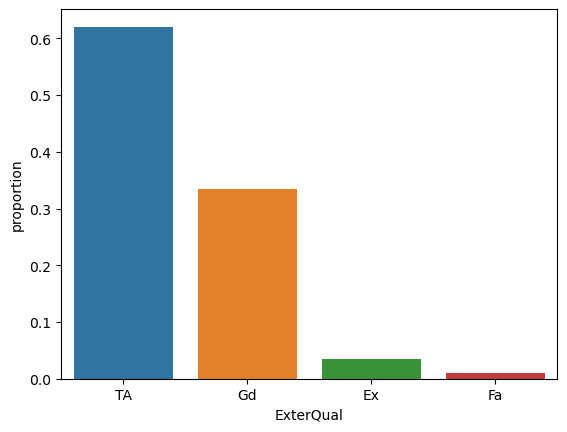

In [43]:
sns.barplot(x=data_categorical['ExterQual'].value_counts().index,
                y=data_categorical['ExterQual'].value_counts(normalize=True))

#### ANALISA VARIABEL EXTERQUAL

* 'Ex' (Excellent) memiliki proporsi tertinggi, menunjukkan bahwa sebagian besar properti dalam dataset memiliki kualitas material eksterior yang sangat baik.

* 'Gd' (Good) memiliki proporsi yang lebih rendah dibanding 'Ex', namun masih menunjukkan bahwa sejumlah properti memiliki kualitas material eksterior yang baik.

* 'TA' (Average/Typical) memiliki proporsi yang lebih rendah lagi, menandakan bahwa sebagian properti memiliki kualitas material eksterior yang rata-rata atau tipikal.

* 'Fa' (Fair) memiliki proporsi yang paling rendah, menunjukkan bahwa hanya sedikit properti dengan kualitas material eksterior yang cukup atau biasa.

## Numerical Variables Visuaization
* Untuk keperluan analisis variabel numeric saya akan gunakan 3 contoh variabel yaitu : SalePrice, GrLivArea, GarageArea

### SalePrice

Variabel 'SalePrice' adalah variabel target yang umumnya digunakan dalam analisis prediktif untuk memprediksi harga properti yang dijual. Ini mewakili harga penjualan properti dalam dataset.

C:\Users\Acer\AppData\Local\Temp\ipykernel_15112\4272357929.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x, axlabel=x.name)


Median: 163000.0
Mean: 180921.19589041095
Std Dev: 79442.50288288663


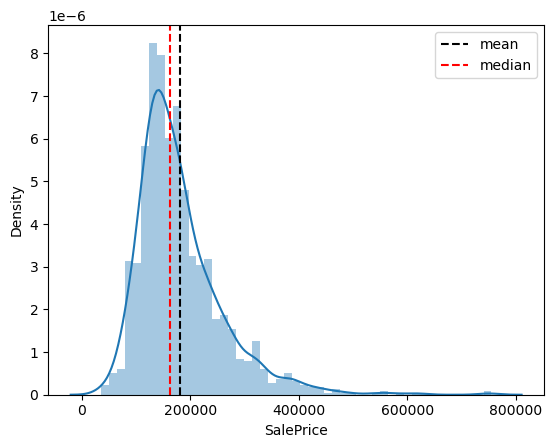

In [44]:
x=data_numeric["SalePrice"]
sns.distplot(x, axlabel=x.name)
line1 = plt.axvline(x.mean(), color="k", linestyle="--", label="mean")
line2 = plt.axvline(np.median(x), color="r", linestyle="--", label="median")
first_legend = plt.legend(handles=[line1,line2], loc=1)
print("Median:", x.median())
print("Mean:", x.mean())
print("Std Dev:", x.std())
plt.show()

#### ANALISA VARIABEL SALEPRICE

* Distribusi right-skewed
* Kebanyakan data berada dalam range 100.000 sampai 300.000. Apakah ini wajar untuk harga rumah di US?
* Nilai selalu positif. Namun, kalau dimasukkan ke model ML Hasil prediksi bisa jadi negatif kalau salah
* Solusinya yaitu coba transformasikan dengan log scale

        * Membuat distribusi terlihat seperti distribusi normal
        * Memaksa nilai harga selalu positif, bahkan ketika dimasukkan kedalam model

C:\Users\Acer\AppData\Local\Temp\ipykernel_15112\974635184.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x, axlabel=x.name)


Median: 5.212187604403958
Mean: 5.221978956475628
Std Dev: 0.17347974217176843


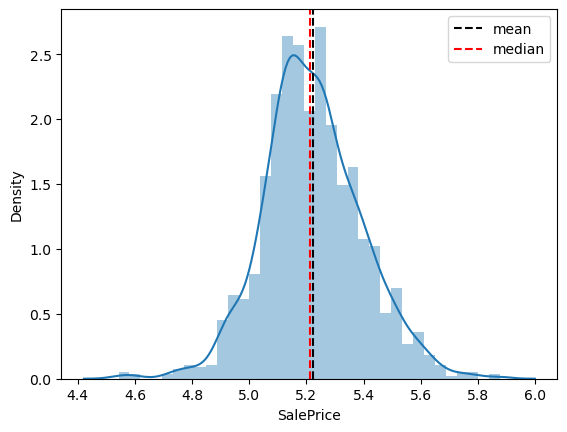

In [45]:
x=np.log10(data_numeric["SalePrice"])
sns.distplot(x, axlabel=x.name)
line1 = plt.axvline(x.mean(), color="k", linestyle="--", label="mean")
line2 = plt.axvline(np.median(x), color="r", linestyle="--", label="median")
first_legend = plt.legend(handles=[line1,line2], loc=1)
print("Median:", x.median())
print("Mean:", x.mean())
print("Std Dev:", x.std())
plt.show()

### GrLivArea

Variabel 'GrLivArea' dalam dataset menginformasikan tentang luas area tinggal di atas permukaan tanah (tidak termasuk basement) dalam satuan square feet (kaki persegi). Ini memberikan informasi tentang ukuran area tempat tinggal di lantai atas dari suatu properti.

Median: 1464.0
Mean: 1515.463698630137
Std Dev: 525.4803834232027


C:\Users\Acer\AppData\Local\Temp\ipykernel_15112\851587855.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x, axlabel=x.name, bins=20)


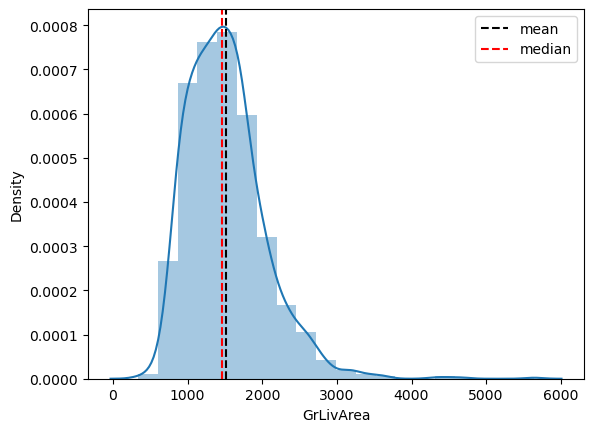

In [47]:
x=data_numeric["GrLivArea"]
sns.distplot(x, axlabel=x.name, bins=20)
line1 = plt.axvline(x.mean(), color="k", linestyle="--", label="mean")
line2 = plt.axvline(np.median(x), color="r", linestyle="--", label="median")
first_legend = plt.legend(handles=[line1,line2], loc=1)
print("Median:", x.median())
print("Mean:", x.mean())
print("Std Dev:", x.std())
plt.show()

#### ANALISA VARIABEL GRLIVAREA

* Bentuk Distribusi: Histogram GrLivArea menunjukkan distribusi yang cenderung miring ke kanan (right-skewed) atau memiliki ekor panjang di sisi kanan grafik.
* Central Tendency: Nilai mean (rata-rata) luas area tinggal (1515 square feet) sedikit lebih tinggi daripada nilai median (1464 square feet). Hal ini menandakan adanya kemiringan atau skewness ke kanan pada distribusi data.
* Kisaran Nilai: Kisaran luas area tinggal bervariasi antara sekitar 900 hingga 2200 square feet dengan standar deviasi sekitar 525 square feet.

Analisis ini menunjukkan bahwa mayoritas properti memiliki luas area tinggal yang relatif kecil (dalam kisaran 900-2200 square feet), namun terdapat beberapa properti yang memiliki luas area tinggal yang jauh lebih besar, yang menimbulkan skewness dalam distribusi data. 

### GarageArea

Variabel 'GarageArea' pada dataset memberikan informasi tentang luas area garasi pada properti yang terdaftar, jika garasi ada, dan diukur dalam satuan square feet (kaki persegi).

C:\Users\Acer\AppData\Local\Temp\ipykernel_15112\4151003244.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x, axlabel=x.name)


Median: 480.0
Mean: 472.9801369863014
Std Dev: 213.80484145338076


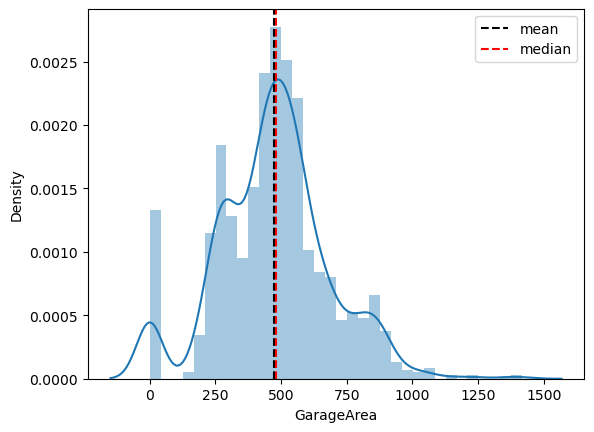

In [50]:
x=data_numeric["GarageArea"]
sns.distplot(x, axlabel=x.name)
line1 = plt.axvline(x.mean(), color="k", linestyle="--", label="mean")
line2 = plt.axvline(np.median(x), color="r", linestyle="--", label="median")
first_legend = plt.legend(handles=[line1,line2], loc=1)
print("Median:", x.median())
print("Mean:", x.mean())
print("Std Dev:", x.std())
plt.show()

#### ANALISA VARIABEL GARAGEAREA

* Bentuk Distribusi: Histogram 'GarageArea' cenderung menunjukkan distribusi yang sedikit miring ke kiri atau ke arah nilai yang lebih kecil.
* Central Tendency: Nilai mean (rata-rata) luas area garasi (sekitar 473 square feet) hampir sama dengan nilai median (480 square feet). Hal ini menunjukkan sedikitnya skewness atau kemiringan pada distribusi data.
* Tingkat Variabilitas: Standar deviasi (sekitar 214 square feet) menunjukkan variasi luas area garasi dari nilai rata-rata.

Analisis ini menunjukkan bahwa mayoritas properti memiliki luas area garasi yang relatif seragam, dengan distribusi yang tidak terlalu condong ke satu sisi. Distribusi yang hampir simetris ini menunjukkan bahwa luas area garasi cenderung beragam, tetapi mayoritas properti memiliki luas area garasi yang berada di sekitar nilai rata-rata dan median yang sama atau mirip.

# 2D Visualization

### VISUALISASI `GrLivArea` dengan `SalePrice`

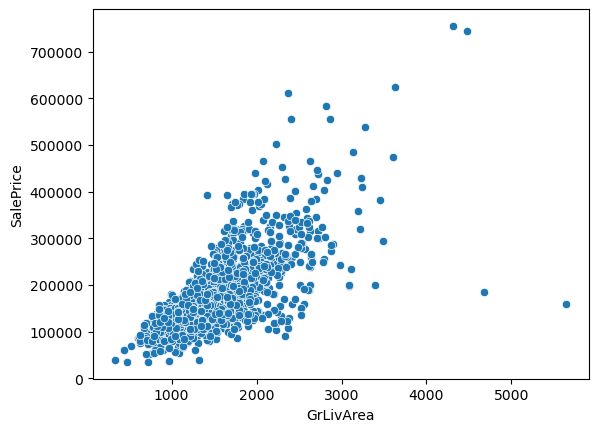

In [53]:
ax = sns.scatterplot(y="SalePrice", x="GrLivArea", data=data_numeric)
plt.show()

#### Analisa hubungan antara variabel GrLivArea dengan SalePrice

* Dapat diketahui bahwa variabel 'GrLivArea' memiliki korelasi positif dengan variabel 'SalePrice'
* Namun, dapat diketahui juga bahwa data memiliki kemungkinan anomali
* Yaitu titik yang berasa pada ujung kanan
* Dari scatterplot, bisa digunakan untuk melihat trendline dari data yan dianalisis

### Visualisasi `GarageArea` dengan `SalePrice`

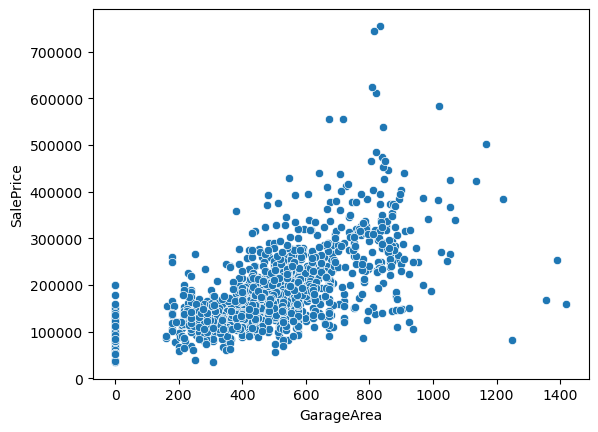

In [54]:
ax = sns.scatterplot(y="SalePrice", x="GarageArea", data=data_numeric)
plt.show()

#### Analisa hubungan antara variabel GarageArea dengan SalePrice

* Dapat diketahui bahwa variabel 'GarageArea' memiliki korelasi positif dengan variabel 'SalePrice'
* Namun, dapat diketahui juga bahwa data memiliki kemungkinan anomali
* Yaitu titik yang berasa pada ujung kanan
* Dari scatterplot, bisa digunakan untuk melihat trendline dari data yan dianalisis